Load Mnist Data

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

(60000, 28, 28)

The network Architecture

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # dense means fully connected
    layers.Dense(10, activation="softmax")
])

Compilation Step    

In [7]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy", 
              metrics=["accuracy"])

Prepare the image data

We **reshape** the image data into the shape model expects, and **scale** it so that all values fall in [0,1]

In [8]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") /255

Fit the model

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2580 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1050 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9886


Predict using the trained model

In [10]:
predictions = model.predict(test_images[0:10])
predictions[0]

array([6.9866685e-10, 7.1907320e-11, 5.1587142e-07, 8.9586820e-06,
       3.9003249e-12, 2.8066692e-08, 1.0632178e-14, 9.9998963e-01,
       2.2213086e-08, 8.8917915e-07], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image[0] belongs to class i.

In [13]:
predictions[0].argmax()
predictions[0][7]


0.9999896

Evaluate the model using test data

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0.9808
test_acc:  0.9807999730110168


Display digit using matplotlib

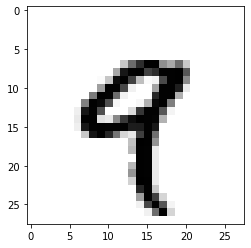

In [21]:
import matplotlib.pyplot as plt
# reload data since the fomer section scale it.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Real-world example of data tensors

- vector data (rank-2)
  (samples, features)
- timeseries data or sequence data (rank-3)
  (samples, timesteps, features), each sample is a sequence (of length timestemps) of feature vectors
- images (rank-4)
  (samples, height, width, channels), each sample is a 2D grid of pixels, and each pixel is represented by a vector of values(channels)
- video (rank-5)
  (samples, frames, height, width, channels)

# Graident tape in Tensorflow

In [34]:
import tensorflow as tf
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2, )))
x = tf.Variable(tf.random.uniform((2,2)))
print(x)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.7000853 , 0.9868399 ],
       [0.33761334, 0.32055295]], dtype=float32)>
tf.Tensor(
[[0.54686403 1.6782697 ]
 [0.54686403 1.6782697 ]], shape=(2, 2), dtype=float32)


In [37]:
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient) # g(x ^ 2) = 2x

tf.Tensor(6.0, shape=(), dtype=float32)


Tensorflow can also calculate 2nd order gradient

In [38]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    print("speed: ", speed)
acceleration = outer_tape.gradient(speed, time)
print("acceleration: ", acceleration)


speed:  tf.Tensor(0.0, shape=(), dtype=float32)
acceleration:  tf.Tensor(9.8, shape=(), dtype=float32)


# An end to end example: A linear classifier in pure TensorFlow

In [ ]:
import numpy as np

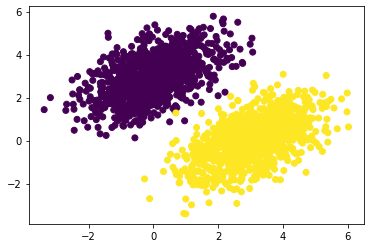

In [40]:

# generate two classes of pointers
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()


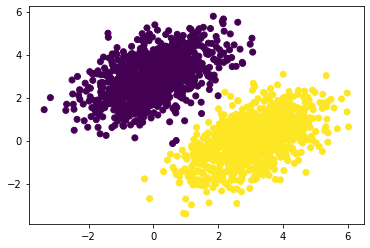

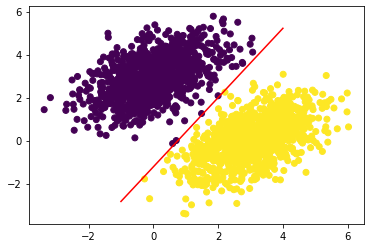

In [46]:
input_dim, output_dim = 2, 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets-predictions))

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss

for step in range(40):
    loss = training_step(inputs, targets)

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:,0] > 0.5)
# plot the points with colors, almost the same as targets
plt.show()

x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:,0] > 0.5)
